# What is Signal Processing?

[Grant Maloy Smith](https://dewesoft.com/blog/what-is-signal-processing) says: "Signal processing involves converting or transforming data in a way that allows us to see things in it that are not possible via direct observation. Signal processing allows engineers and scientists to analyze, optimize, and correct signals, including scientific data, audio streams, images, and video."

### Important Concepts

**Time-domain vs. Frequency-domain:**
* Time-domain shows how a signal changes over time.
* Frequency-domain shows which frequencies are present (using Fourier Transform).


**Sampling and the Nyquist-Shannon Theorem**

Recommended videos: 
* [The intuition behind the Nyquist-Shannon Sampling Theorem](https://www.youtube.com/watch?v=Jv5FU8oUWEY): for a quick intuition.
* [Shannon Nyquist Sampling Theorem](https://www.youtube.com/watch?v=FcXZ28BX-xE): more complete.

General concepts surrounding this discussion. 
* **Sampling:** Converting a continuous signal into a discrete one by taking measurements at regular intervals.
* **Sampling Rate ($F_s$):** How many samples per second (Hz) you take. E.g., 500 Hz means 500 measurements per second.
* **Nyquist Frequency ($F_n$):** Is the highest frequency that can be correctly reconstructed. 
$$
    F_n = \frac{F_s}{2}
$$
* **Aliasing:** Occurs when higher frequencies fold into lower ones, leading to distortion. Always filter before downsampling!
$$
    F_{\text{max signal}} < F_n
$$


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

! ls data/

Sample_Time-Series_Sensor_Data.csv


**Common Techniques:** Includes smoothing, filtering, detrending, etc.
* Smoothing (Rolling Average)
* Low-pass filtering (removing high-frequency noise)
* Detrending (removing slow drifts)


**Feature Extraction:** You convert raw signals into meaningful features.
 * Mean, Std, Max, Min
 * Root Mean Square (RMS)
 * Peak-to-Peak Amplitude
 * Frequency domain features (via FFT)

**Time Alignment:** Used when comparing signals under different conditions (e.g., different gears or clutch states).
* Dynamic Time Warping (DTW) for alignment
* Windowing: Segment the time series for analysis
* Normalization: Remove offsets or scaling effects


# 0. Generate the data: simulation of a time-series dataset. 

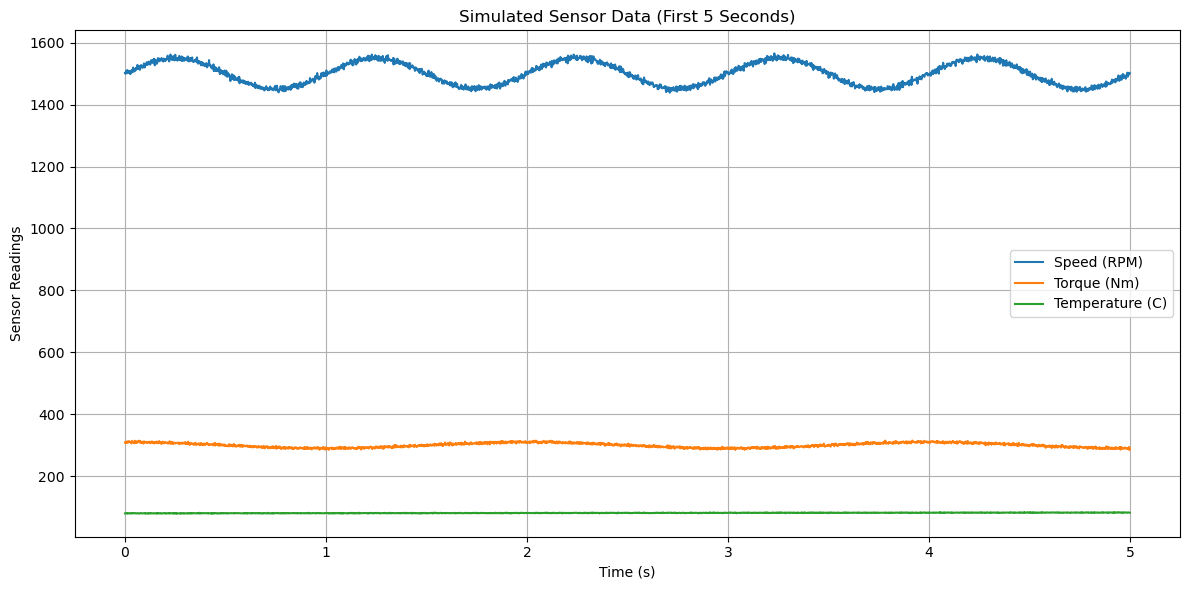

In [9]:


# Simulate a sample multivariate time-series dataset (e.g., 3 sensors at 500 Hz for 10 seconds)
fs = 500  # sampling frequency in Hz
duration = 10  # in seconds
t = np.linspace(0, duration, duration * fs)

# Simulate signals (sinusoids + noise)
np.random.seed(42)
speed_sensor = 1500 + 50 * np.sin(2 * np.pi * 1 * t) + np.random.normal(0, 5, len(t))
torque_sensor = 300 + 10 * np.cos(2 * np.pi * 0.5 * t) + np.random.normal(0, 2, len(t))
temp_sensor = 80 + 0.5 * t + np.random.normal(0, 0.5, len(t))

# Create a DataFrame
df = pd.DataFrame({
    'Time (s)': t,
    'Speed Sensor (RPM)': speed_sensor,
    'Torque Sensor (Nm)': torque_sensor,
    'Temperature Sensor (C)': temp_sensor
})

# Plot the data (first 5 seconds for visualization clarity)
plt.figure(figsize=(12, 6))
plt.plot(t[:2500], speed_sensor[:2500], label='Speed (RPM)')
plt.plot(t[:2500], torque_sensor[:2500], label='Torque (Nm)')
plt.plot(t[:2500], temp_sensor[:2500], label='Temperature (C)')
plt.xlabel("Time (s)")
plt.ylabel("Sensor Readings")
plt.title("Simulated Sensor Data (First 5 Seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. Signal Processing

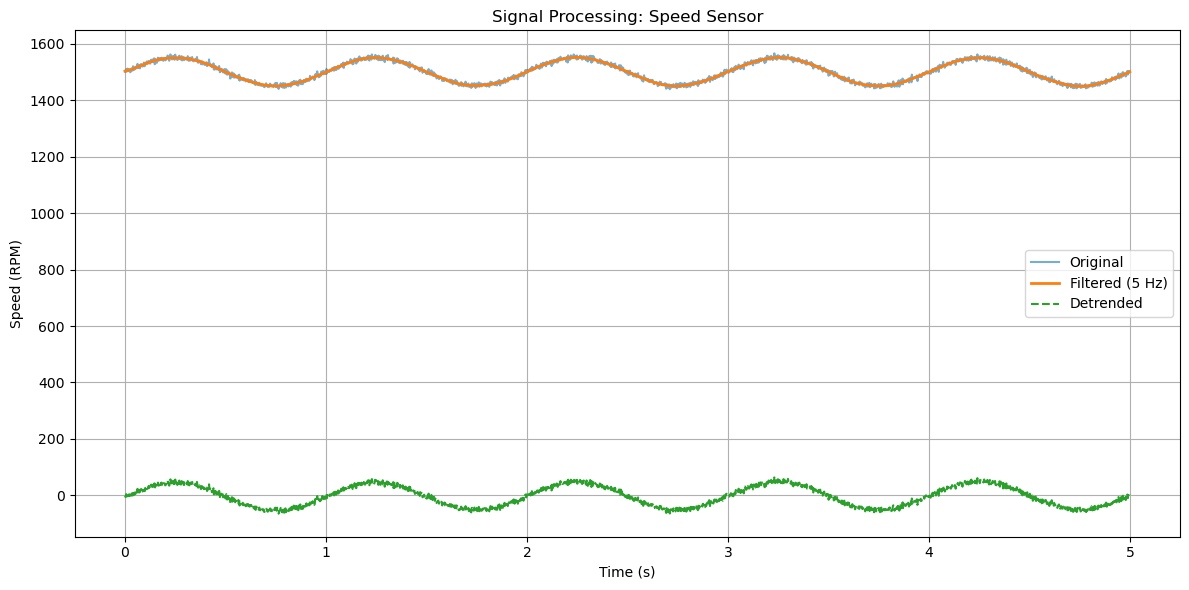

In [10]:
from scipy.signal import butter, filtfilt, detrend

# Define Butterworth low-pass filter
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Apply filtering and detrending to speed sensor
cutoff_freq = 5  # Hz
speed_filtered = butter_lowpass_filter(df['Speed Sensor (RPM)'], cutoff=cutoff_freq, fs=fs)
speed_detrended = detrend(df['Speed Sensor (RPM)'])

# Add to DataFrame
df['Speed Filtered'] = speed_filtered
df['Speed Detrended'] = speed_detrended

# Plot original vs filtered vs detrended
plt.figure(figsize=(12, 6))
plt.plot(df['Time (s)'][:2500], df['Speed Sensor (RPM)'][:2500], label='Original', alpha=0.6)
plt.plot(df['Time (s)'][:2500], speed_filtered[:2500], label='Filtered (5 Hz)', linewidth=2)
plt.plot(df['Time (s)'][:2500], speed_detrended[:2500], label='Detrended', linestyle='--')
plt.title('Signal Processing: Speed Sensor')
plt.xlabel('Time (s)')
plt.ylabel('Speed (RPM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
